In [186]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import ceil
from mpl_toolkits import mplot3d

In [167]:
# data = pd.read_csv("fods_1.csv").to_numpy()
data = pd.read_csv("fods_1.csv")

In [168]:
training_data = data.sample(frac = 0.8)
test_data = data.drop(training_data.index)
# np.random.shuffle(data)
# N = data.shape[0]

training_data = training_data.to_numpy()
test_data = test_data.to_numpy()

# N_train = ceil(N * 0.8)
# N_test = N - N_train

X_train = training_data[:, :2].T
Y_train = training_data[:,2].T

X_test = test_data[:,:2].T
Y_test = test_data[:,2].T

N_train = len(X_train[0])
N_test = len(X_test[0])

print(N_train, N_test)

437 109


# POLYNOMIAL REGRESSION

In [169]:
def normalize (X):

    mean = np.array(np.mean(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])
    std = np.array(np.std(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])

    mean = np.concatenate((np.zeros([1,1]), mean), axis = 0)
    std = np.concatenate((np.ones([1,1]), std), axis = 0)

    mean = np.repeat(mean, len(X[0]), axis = 1)
    std = np.repeat(std, len(X[0]), axis = 1)

    X = (X - mean) / std

    return X


In [207]:
def generate_feature_matrix(X, deg):

    mat = np.ones([1,len(X[0])])
    for i in range (1, deg + 1):
        for j in range(i+1):
            k = i - j
            newRow = np.array((X[0]**j) * (X[1]**k)).reshape([1, len(X[0])])
            mat = np.concatenate((mat, newRow), axis = 0)
            
    # return normalize(mat)
    return mat

In [171]:
def loss_function(Y, X, W):
    return np.sum(1 / (2 * len(X[0])) * np.power((Y - W.T @ X), 2))

In [172]:
def gradient_descent(Y, X, W, alpha, iterations):
    
    N = len(X[0])
    cost = np.zeros(iterations)

    for i in range(iterations):
        W = W + (alpha / N)*(X @ (Y - W.T @ X).T)
        cost[i] = loss_function(Y, X, W)
    
    return W, cost

In [173]:
def stochastic_descent(Y, X, W, alpha, iterations):

    N = len(X[0])
    M = len(X)
    cost = np.zeros(iterations)

    for i in range(iterations):

        index = random.randint(0, N - 1)
        Xi = X[:, index].reshape([M, 1])
        Yi = Y[index].reshape([1, 1])

        W = W + (alpha / N) * (Xi @ (Yi - W.T @ Xi).T)
        cost[i] = loss_function(Y, X, W)

    return W, cost

In [174]:
def training_polynomial_regression(Y, X, descent_type):

    error_history = np.zeros([10, 1])
    W_history = []

    # plt.title("Polynomial regression")
    # plt.xlabel("Iterations")
    # plt.ylabel("Error")

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]
        W = np.zeros([count, 1])

        iterations = 1000
        # alpha_array = []
        # final_cost_array = []

        alpha = 0.04

        # while(alpha >= 0.001):

        #     W_grad, cost_grad = descent_type(Y, _X, W, alpha, iterations)
        #     rounded_cost = float("{:.4f}".format(cost_grad[len(cost_grad) - 1]))
        #     alpha_array.append(alpha)
        #     final_cost_array.append(rounded_cost)

        #     alpha -= 1e-3
        
        # plt.plot(alpha_array, )

        W_desc, cost_desc = descent_type(Y, _X, W, alpha, iterations)

        grad_descent_graph = np.array([i for i in range (len(cost_desc))])

        # title_string = "Polynomial Regression for degree " + str(i)
        rounded_cost = float("{:.4f}".format(cost_desc[len(cost_desc) - 1]))

        error_history[i][0] = rounded_cost 
        # W_history[i] = W_history[i].reshape([1, len(W_desc)])
        W_history.append(W_desc.reshape([len(W_desc)]))

        plt.plot(grad_descent_graph, cost_desc)
        
        # plt.show()

        # plt.plot(alpha_array, final_cost_array)
        # plt.show()
    
    plt.show()

    return error_history, W_history

In [175]:
def testing_polynomial_regression(Y, X, W):

    error_history = np.zeros([10, 1])

    for i in range(10):

        count = (i + 1) * (i + 2) / 2
        count = int(count)

        _X = X[:count, :]
        
        error_history[i][0] = loss_function(Y, _X, W[i])
    
    return error_history

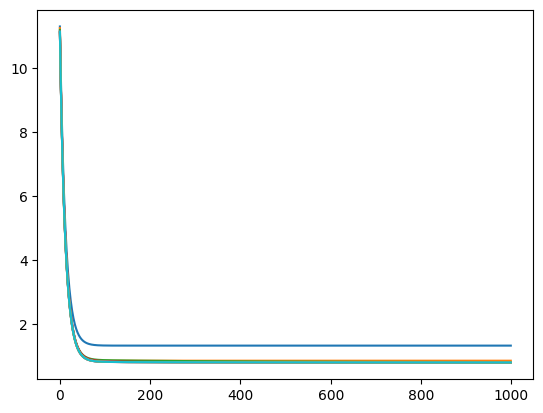

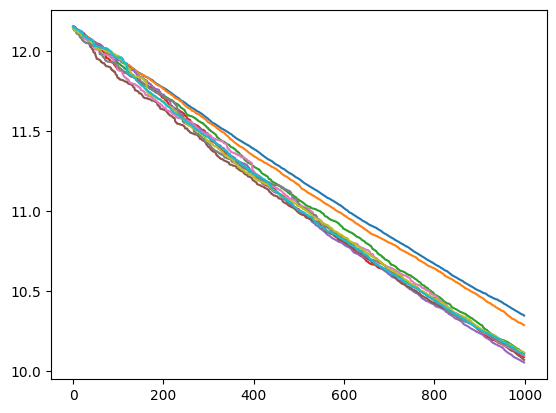

In [176]:
X = generate_feature_matrix(X_train, 9)
X = normalize(X)
training_error_gradient, W_gradient = training_polynomial_regression(Y_train, X, gradient_descent)
training_error_stochastic, W_stochastic = training_polynomial_regression(Y_train, X, stochastic_descent)

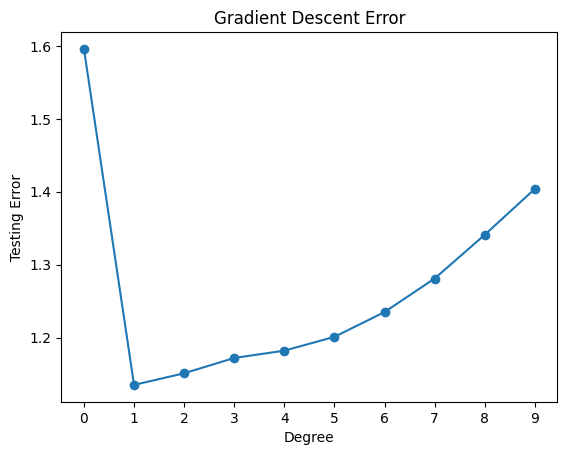

In [177]:
X = generate_feature_matrix(X_test, 9)
W = [i.reshape([len(i), 1]) for i in W_gradient]
testing_error_gradient = testing_polynomial_regression(Y_test, X, W)

rounded_test_error = [float("{:.3f}".format(testing_error_gradient[i][0])) for i in range(10)]

plt.plot([i for i in range(10)], rounded_test_error, marker = 'o')
plt.xticks([i for i  in range(10)])
plt.xlabel("Degree")
plt.ylabel("Testing Error")
plt.title("Gradient Descent Error")
plt.show()

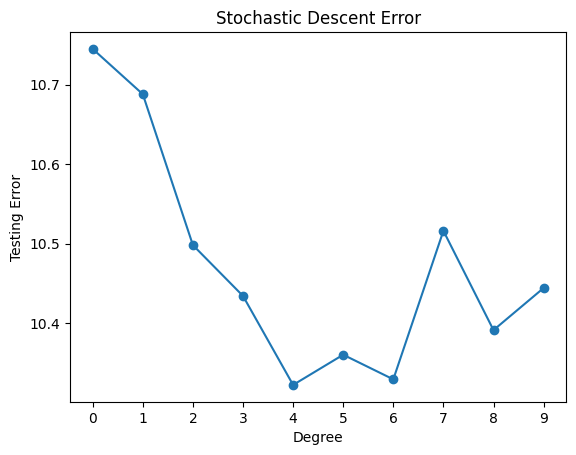

In [178]:
W = [i.reshape([len(i), 1]) for i in W_stochastic]
testing_error_stochastic = testing_polynomial_regression(Y_test, X, W)

rounded_test_error = [float("{:.3f}".format(testing_error_stochastic[i][0])) for i in range(10)]

plt.plot([i for i in range(10)], rounded_test_error, marker = 'o')
plt.xticks([i for i  in range(10)])
plt.xlabel("Degree")
plt.ylabel("Testing Error")
plt.title("Stochastic Descent Error")
plt.show()

In [179]:
degrees = np.array([i for i in range(10)]).reshape([10,1])
polynomial_regression_result = np.concatenate((degrees, training_error_gradient, training_error_stochastic, testing_error_gradient, testing_error_stochastic), axis = 1)

In [180]:
polynomial_regression_table = pd.DataFrame(polynomial_regression_result, columns = ['Degree', 'Training Error (Gradient)', 'Training Error (Stochastic)','Testing Error (Gradient)', 'Testing Error (Stochastic)'])
polynomial_regression_table

,Degree,Training Error (Gradient),Training Error (Stochastic),Testing Error (Gradient),Testing Error (Stochastic)
0,0.0,1.3310,10.3470,1.596411,10.745244
1,1.0,0.8597,10.2875,1.134631,10.688192
2,2.0,0.8166,10.1109,1.150812,10.497612
3,3.0,0.8054,10.0881,1.172199,10.433647
4,4.0,0.8064,10.0540,1.181870,10.321589
5,5.0,0.8064,10.0703,1.201023,10.360027
6,6.0,0.8054,10.0975,1.235326,10.329438
7,7.0,0.8045,10.1122,1.281250,10.516144
8,8.0,0.8041,10.1158,1.340989,10.391093
9,9.0,0.8041,10.1066,1.403942,10.444406


# REGULARIZATION

In [181]:
def regularized_loss_function(Y, X, W, lam, q):

    loss1 = np.sum(1 / (2 * len(X[0])) * ((Y - W.T @ X) ** 2))
    loss2 = np.sum(lam / 2 * (np.abs(W) ** q))

    return loss1 + loss2

In [182]:
def error_function(Y, X, W):
    return np.sum(1 / (2 * len(X[0])) * ((Y - W.T @ X) ** 2))

In [183]:
# l = lambda
def regularized_gradient_descent(Y, X, W, q, alpha, l, iterations):
    N = 437
    M = len(X)
    cost = np.zeros(iterations)

    for i in range(iterations):

        W = W - (alpha) * (((-1 / N) * (X @ (Y - W.T @ X).T)) + ((l / 2) * q * (np.abs(W) ** (q - 1))))
        cost[i] = regularized_loss_function(Y, X, W, l, q)

    return W, cost

In [184]:
X = np.concatenate((np.ones([1, len(X_train[0])]), X_train), axis = 0)
Y = Y_train

X_test = np.concatenate((np.ones([1, len(X_test[0])]), X_test), axis = 0)

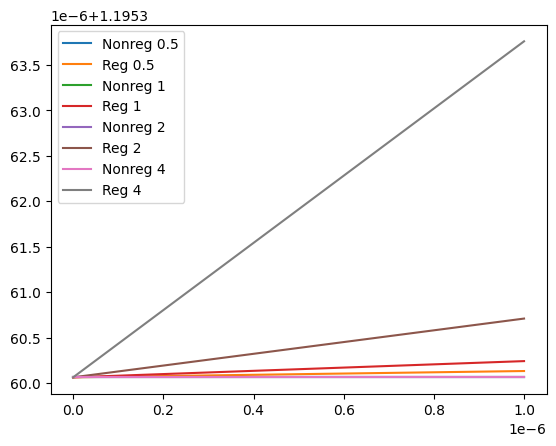

In [185]:
q_vec = [0.5, 1, 2, 4]
lam_vec = np.linspace(0, 1e-6, 100)
alpha = 0.01
iterations = 1000
# fig_train, ax_train = plt.subplots()
fig, ax_reg = plt.subplots(1, 1)
for i in range(4):
    q = q_vec[i]
    cost_vec_nonreg = []
    cost_vec_reg = []
    for l in lam_vec:
        W = np.ones([3, 1])
        W, cost = gradient_descent(Y, X, W, alpha, iterations)
        cost_vec_nonreg.append(error_function(Y_test, X_test, W))
        W = np.ones([3, 1])
        W, cost = regularized_gradient_descent(Y, X, W, q, alpha, l, iterations)
        cost_vec_reg.append(error_function(Y_test, X_test, W))
    ax_reg.plot(lam_vec, cost_vec_nonreg, label=f"Nonreg {q}")
    ax_reg.plot(lam_vec, cost_vec_reg, label=f"Reg {q}")

ax_reg.legend()
# ax_reg.set_title("Regularized")
# ax_nonreg.legend()
# ax_nonreg.set_title("Non regularized")

plt.show()

In [208]:
population = data.to_numpy()[:, :2].T
population_features = generate_feature_matrix(population[:, :5], 9)

# print(population[:, :5])
# print(population_features)

# mean = np.array(np.mean(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])
# std = np.array(np.std(X[1:, :], axis = 1)).reshape([len(X) - 1, 1])

# print(population_features.shape)

population_mean = np.mean(population_features, axis = 0)
population_std = np.std(population_features, axis = 0)

population_mean[0], population_std[0]

[[2.419 2.638 5.799 5.453 4.068]
 [1.225 1.401 2.93  2.887 2.758]]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.22500000e+00 1.40100000e+00 2.93000000e+00 2.88700000e+00
  2.75800000e+00]
 [2.41900000e+00 2.63800000e+00 5.79900000e+00 5.45300000e+00
  4.06800000e+00]
 [1.50062500e+00 1.96280100e+00 8.58490000e+00 8.33476900e+00
  7.60656400e+00]
 [2.96327500e+00 3.69583800e+00 1.69910700e+01 1.57428110e+01
  1.12195440e+01]
 [5.85156100e+00 6.95904400e+00 3.36284010e+01 2.97352090e+01
  1.65486240e+01]
 [1.83826563e+00 2.74988420e+00 2.51537570e+01 2.40624781e+01
  2.09789035e+01]
 [3.63001188e+00 5.17786904e+00 4.97838351e+01 4.54494954e+01
  3.09435024e+01]
 [7.16816223e+00 9.74962064e+00 9.85312149e+01 8.58455484e+01
  4.56411050e+01]
 [1.41549261e+01 1.83579581e+01 1.95011097e+02 1.62146095e+02
  6.73198024e+01]
 [2.25187539e+00 3.85258777e+00 7.37005080e+01 6.94683743e+01
  5.78598159e+01]
 [4.44676455e+00 7.25419452e+00 1.45866637e+02 1.3121

(177.51836519815876, 453.5553745767579)

In [ ]:
def predict_using_gradient(x, W_grad, deg):
    
    return (W.T @ x)[0][0]

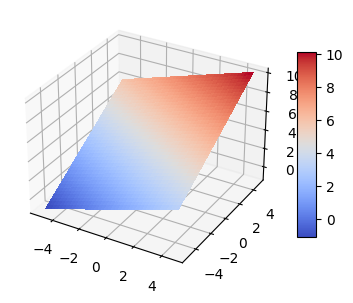

In [191]:
from matplotlib import cm

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
def f(x1,x2):
    X_tmp = [1]
    for i in range (1, 2 + 1):
        for j in range(i+1):
            k = i - j
            X_tmp.append(x1 ** j * x2 ** k)
    return 
Z = f(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()